In [1]:
from sympy import*
from sympy.utilities.codegen import codegen
init_printing()

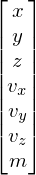

In [2]:
# Parametres of spacecraft
Fx, Fy, Fz = symbols('F_x F_y F_z')
F = Matrix([Fx, Fy, Fz])
mdot = symbols('\dot{m}')

# State of spacecraft
x,y,z,vx,vy,vz,m = symbols('x y z v_x v_y v_z m')
r = Matrix([x, y, z])
v = Matrix([vx, vy, vz])
s = Matrix([r, v, [m]])
s

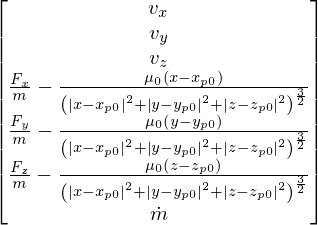

In [10]:
# Velocity
dr = Matrix([vx,vy,vz])

# Propulsion
dv = F/m
dm = mdot

# Gravity
nplanets = 1
for i in range(nplanets):
    mu = symbols('mu_' + str(i))
    xp = symbols('x_p' + str(i))
    yp = symbols('y_p' + str(i))
    zp = symbols('z_p' + str(i))
    rp = Matrix([xp,yp,zp])
    rrel = r - rp
    dv -= mu*rrel/rrel.norm()**3

dsdt = Matrix([dr, dv, [dm]])
dsdt

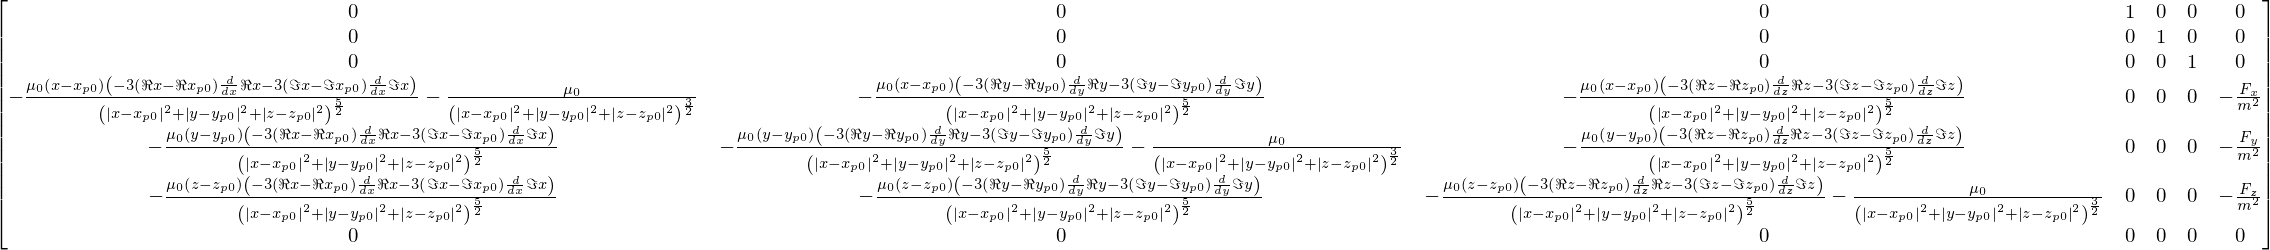

In [11]:
dsdt.jacobian(s)

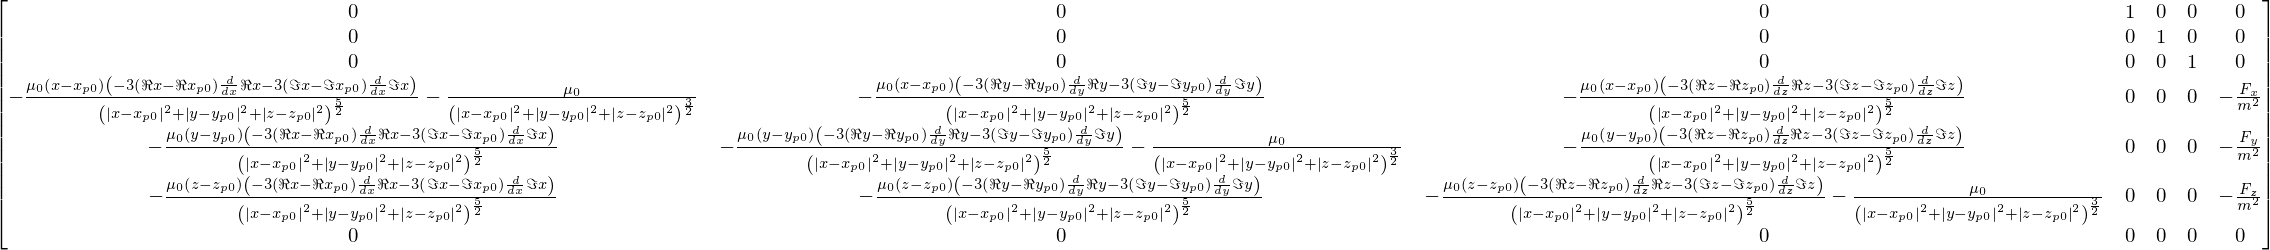

In [12]:
def JAC(state):
    return dsdt.jacobian(state)

JAC(s)

In [13]:
[(c_name, c_code), (h_name, c_header)] = codegen([('jacobian', JAC(s))], 'c')

In [14]:
print(c_header)

/******************************************************************************
 *                     Code generated with sympy 0.7.6.1                      *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/


#ifndef PROJECT__JACOBIAN__H
#define PROJECT__JACOBIAN__H

void jacobian(double F_x, double F_y, double F_z, double m, double mu_0, double x, double x_p0, double y, double y_p0, double z, double z_p0, double *out_2331584745112178394);

#endif




In [15]:
print c_code

/******************************************************************************
 *                     Code generated with sympy 0.7.6.1                      *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "jacobian.h"
#include <math.h>

void jacobian(double F_x, double F_y, double F_z, double m, double mu_0, double x, double x_p0, double y, double y_p0, double z, double z_p0, double *out_2331584745112178394) {

   out_2331584745112178394[0] = 0;
   out_2331584745112178394[1] = 0;
   out_2331584745112178394[2] = 0;
   out_2331584745112178394[3] = 1;
   out_2331584745112178394[4] = 0;
   out_2331584745112178394[5] = 0;
   out_233